# Customer Churn Analysis

### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

### Importing Libraries

In [1]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import scipy as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

The dataset is the details of customer in telecom sector. Dataset has 7043 rows and 21 colums. Most of the columns are having object data type. Churn is ou target variable here and having two value 'Yes' or 'No'. So this is a classification problem.

# Exploratory Data Analysis (EDA)

In [5]:
# To get overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In the dataset, 18 columns are object data type, 2 column interger and 1 column float type.

'customerID' column having some unique number and this column is not going to play much role in predicting. Let's drop this column.

In [6]:
df.drop("customerID", axis=1, inplace=True)

In [7]:
print(f"Rows and Columns before dropping duplicates: ", df.shape)
df.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates: ", df.shape)

Rows and Columns before dropping duplicates:  (7043, 20)
Rows and Columns after dropping duplicates:  (7021, 20)


We have dropped 22 duplicate values.

In [8]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('*'*60)

Male      3541
Female    3480
Name: gender, dtype: int64
************************************************************
0    5880
1    1141
Name: SeniorCitizen, dtype: int64
************************************************************
No     3619
Yes    3402
Name: Partner, dtype: int64
************************************************************
No     4911
Yes    2110
Name: Dependents, dtype: int64
************************************************************
1     591
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
************************************************************
Yes    6339
No      682
Name: PhoneService, dtype: int64
************************************************************
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
************************************************************
Fiber optic    3090
DSL            2419


Checking the number of rows covered by all the unique values present in our object data type columns. It looks like all the columns have proper categories but the column "TotalCharges" has float value still gets tagged as object data type plus 11 rows of that column has blank data. We will need to fix this before we proceed with any further analysis.

In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(' ' , '0.0')
df['TotalCharges'].value_counts()

0.0       11
19.75      9
20.2       8
19.9       7
19.65      7
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [57]:
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'].dtype

dtype('float64')

Column "TotalCharges" even though had all float numbers for some reason it showed as object data type and therefore we are converting it into the float data type now

In [10]:
# Checking the null values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

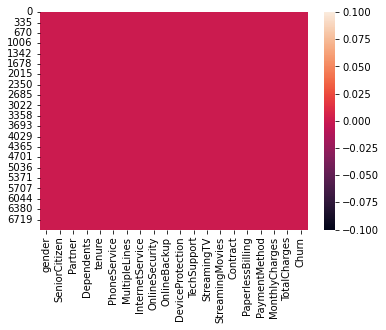

In [11]:
# Let's visualize the null values clearly through Heatmap
sns.heatmap(df.isnull())

From above, we can see that there are no missing values in the dataset.

Now Let's separate the Numerical and Catagorical columns

In [58]:
Catg_data = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        Catg_data.append(x)
Catg_data

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [59]:
Num_data = []
for x in df.dtypes.index:
    if df.dtypes[x]!='object':
        Num_data.append(x)
Num_data

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [15]:
#Checking the unique values in each column
df.nunique().to_frame("Unique Values")

,Unique Values
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [16]:
# Checking the unique values of target variable
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
# Checking the count of values in target variable
df['Churn'].value_counts()

No     5164
Yes    1857
Name: Churn, dtype: int64

Our Label data 'Churn' is not balanced. We need to balance this at later stage.

In [60]:
# Statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2286.765026
std,0.368947,24.534965,30.069001,2266.855057
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.750000,403.350000
50%,0.000000,29.000000,70.400000,1400.550000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


This gives the statiscal data of numerical column.

## Data Visualisation

##### Univariate Analysis

No     5164
Yes    1857
Name: Churn, dtype: int64


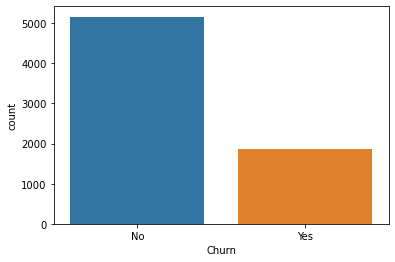

In [19]:
#Visualize the number of churned customers 
print(df["Churn"].value_counts())
sns.countplot(df["Churn"])
plt.show()

From above count plot, we can see 'No' value is more than 'Yes'. Majority of the customers are not churned.

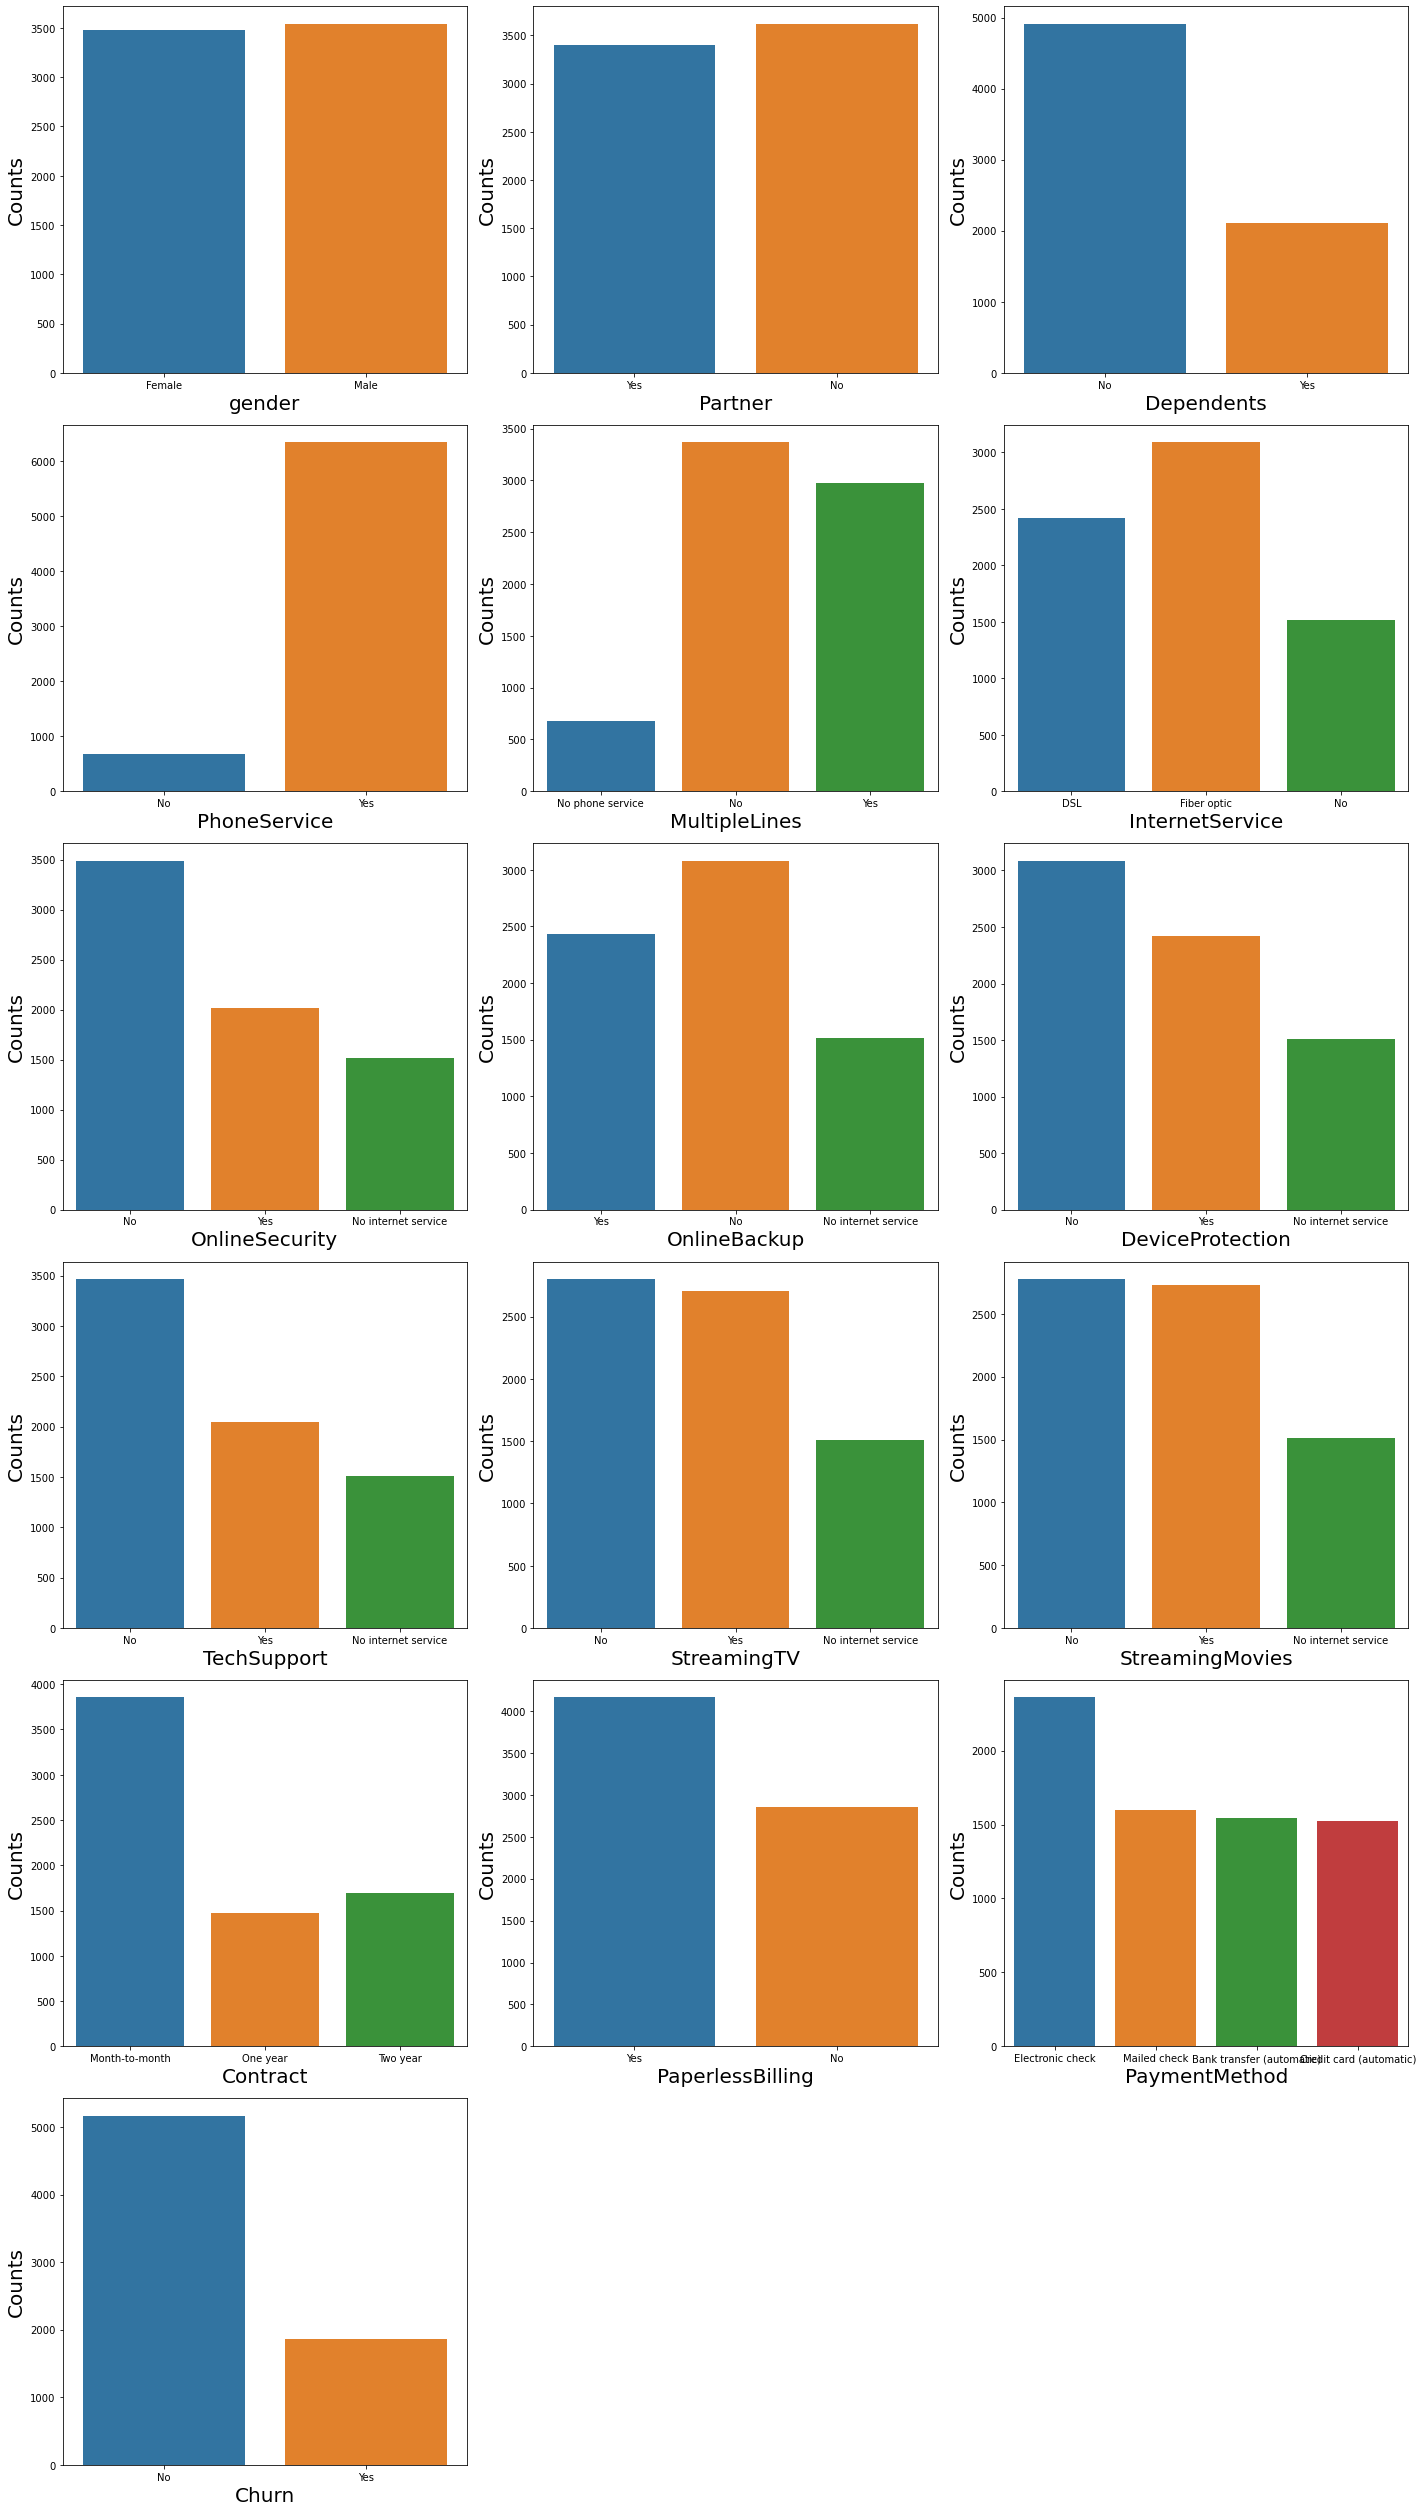

In [61]:
plt.figure(figsize=(20,35))
plotnumber= 1

for column in Catg_data:
    if plotnumber<=17:
        ax= plt.subplot(6,3, plotnumber)
        sns.countplot(df[column])
        
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Counts', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

•	Gender : No of males and females are almost equal

•	Partner: Count for having partner is less as compare to without partner

•	Dependents : Near about 70 percent customers are not having any Dependent

•	PhoneService : More than 90 percent customers have PhoneService

•	MultipleLines : More than 48 percent customer not having multiple lines

•	InternetService : For More than 44 percent customers internet service provider is Fiber Optics

•	OnlineSecurity: 49 percent customers are not having Online Security

•	OnlineBackup: More than 43 customers Not having online backup

•	DeviceProtection : More than 43 customers are not having Device Protection

•	TechSupport: 49 percent customers are not having any technical support

•	StreamingTV : The count for Streaming TV and Not Streaming TV are almost same

•	StreamingMovies : The count for Streaming Movies and Not Streaming Movies are almost same

•	Contract : More than 55 percent of the cutmores are having month-to-month contract

•	PaperlessBilling : we can see more than 59 percent of the customers are using PaperlessBilling

•	PaymentMethod : Most of the customers are using Electronic check

•	Churn : 26 percent customer out 100 are churned.


0    5880
1    1141
Name: SeniorCitizen, dtype: int64


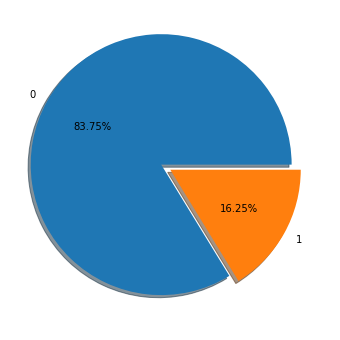

In [23]:
print(df['SeniorCitizen'].value_counts())
labels='0','1'
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(df['SeniorCitizen'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,explode=(0.08,0))
plt.show()

Here 0 represents the non senoir citizens and 1 represents the senior citizens. The count of 0 is high in data compared to 1 which means the number non seniorcitizens are quite high compared to senior citizens data in the given dataset. Around 83% of the customers are non senior citizens and only 16% are senior citizens

##### Bivariate Analysis

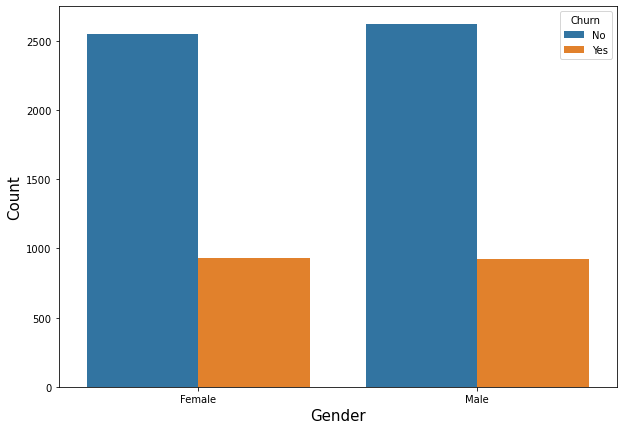

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(df['gender'], hue='Churn', data= df)
plt.xlabel('Gender', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

Here Male and Fmale have equal chances of churn

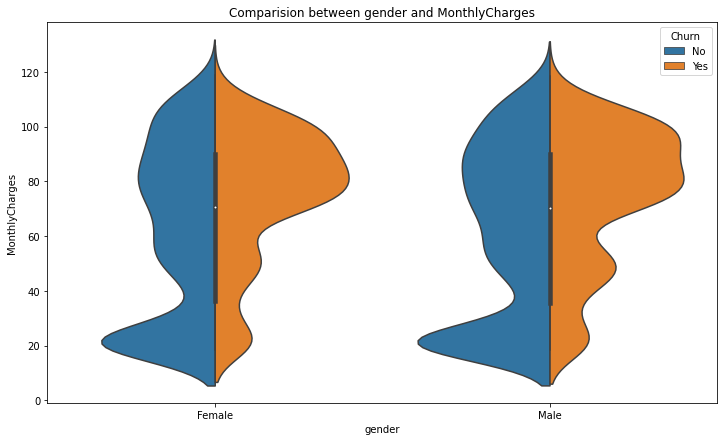

In [27]:
#Comparing gender and MonthlyCharges
plt.figure(figsize=(12,7))
plt.title("Comparision between gender and MonthlyCharges")
sns.violinplot( x = "gender",y = "MonthlyCharges", data = df,hue="Churn",split=True)
plt.show()

Both male and female customers with monthly charges above 60 have high chances of getting churned.

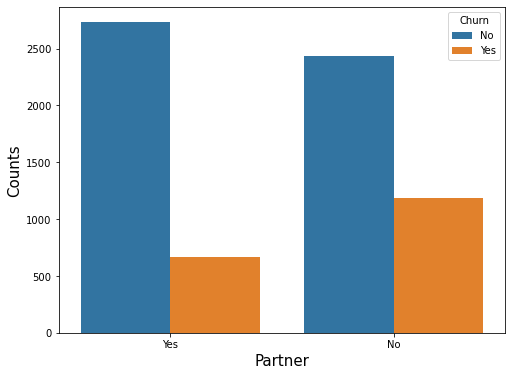

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x='Partner', data= df, hue='Churn')
plt.xlabel('Partner', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Here we can see the customers not having partners are more likely to churn.

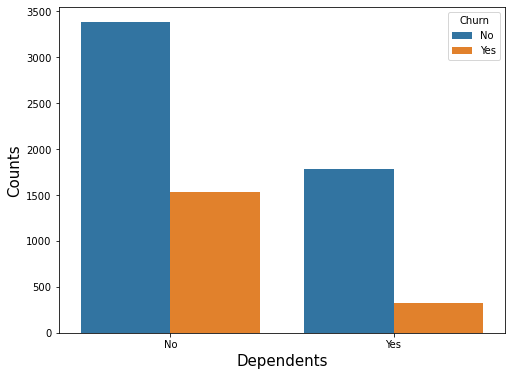

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x='Dependents', data= df, hue='Churn')
plt.xlabel('Dependents', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Custometr having no depends are more likely to churn

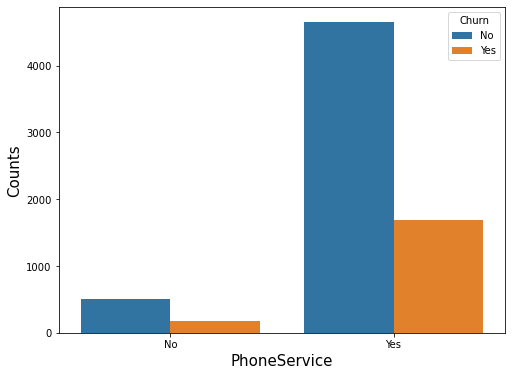

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(x='PhoneService', data= df, hue='Churn')
plt.xlabel('PhoneService', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having phone service are more likely to churn

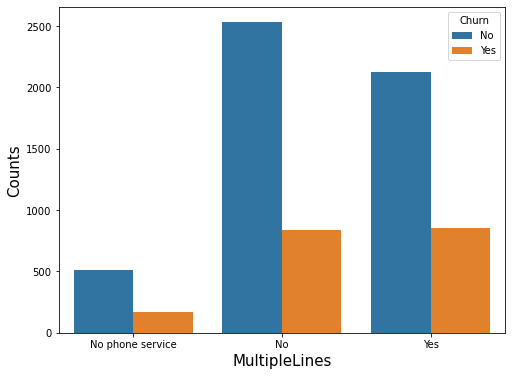

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x='MultipleLines', data= df, hue='Churn')
plt.xlabel('MultipleLines', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having multiple lines are more likely to churn.

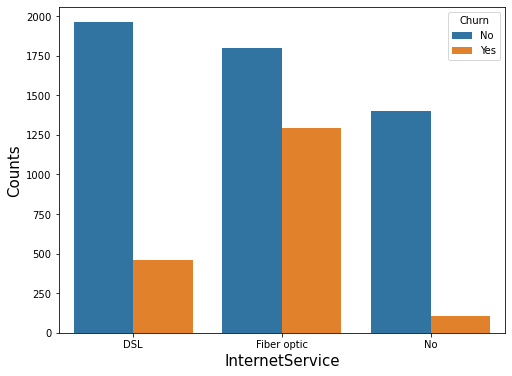

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(x='InternetService', data= df, hue='Churn')
plt.xlabel('InternetService', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having fiber optics internet service are more likely to churn.

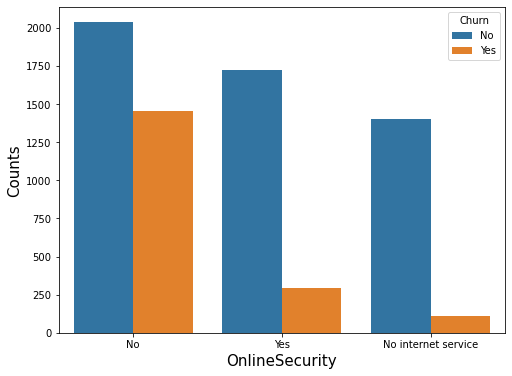

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(x='OnlineSecurity', data= df, hue='Churn')
plt.xlabel('OnlineSecurity', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having Online security are more likely to churn.

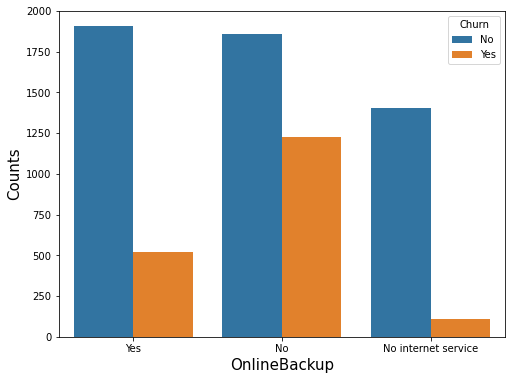

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(x='OnlineBackup', data= df, hue='Churn')
plt.xlabel('OnlineBackup', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having online backup are more likely to churn.

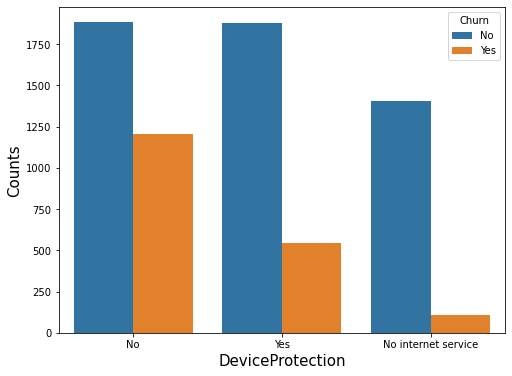

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(x='DeviceProtection', data= df, hue='Churn')
plt.xlabel('DeviceProtection', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having Device Protection are more likly to churn.

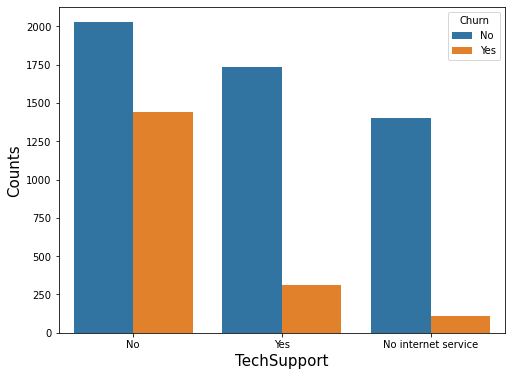

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x='TechSupport', data= df, hue='Churn')
plt.xlabel('TechSupport', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers without any Technical support are more likely to churn

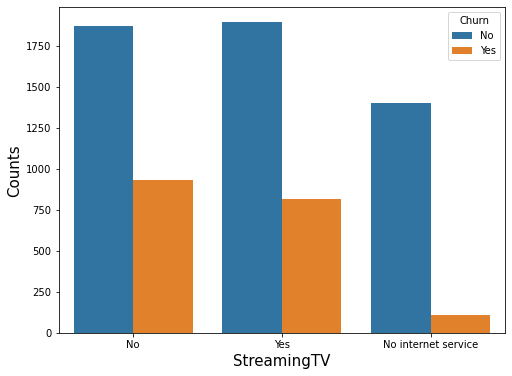

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(x='StreamingTV', data= df, hue='Churn')
plt.xlabel('StreamingTV', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having Streaming TV are more likely to churn.

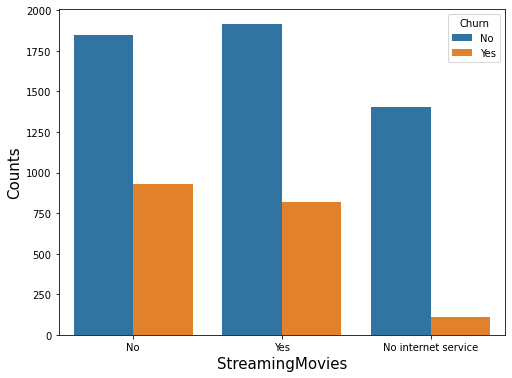

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(x='StreamingMovies', data= df, hue='Churn')
plt.xlabel('StreamingMovies', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having Streaming Movies are more likely to churn.

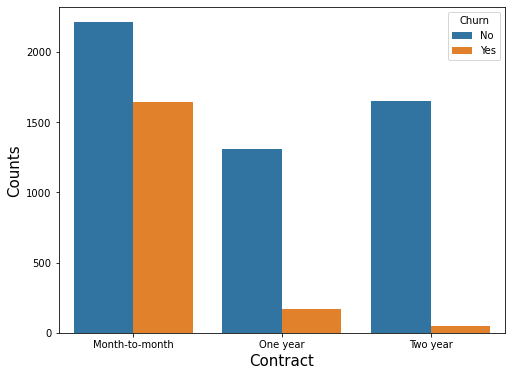

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(x='Contract', data= df, hue='Churn')
plt.xlabel('Contract', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having Month to month Contract are more likely to churn.

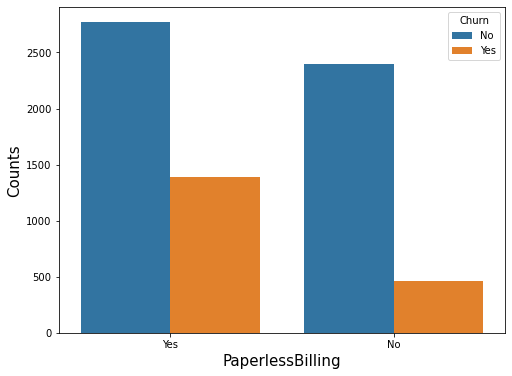

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(x='PaperlessBilling', data= df, hue='Churn')
plt.xlabel('PaperlessBilling', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having Paperless Billing are more likely to churn.

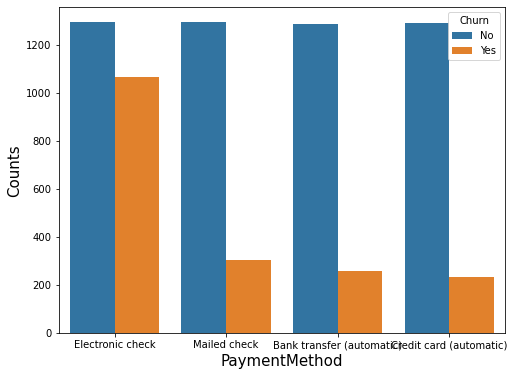

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(x='PaymentMethod', data= df, hue='Churn')
plt.xlabel('PaymentMethod', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having Electronucs Payment method are more likely to churn.

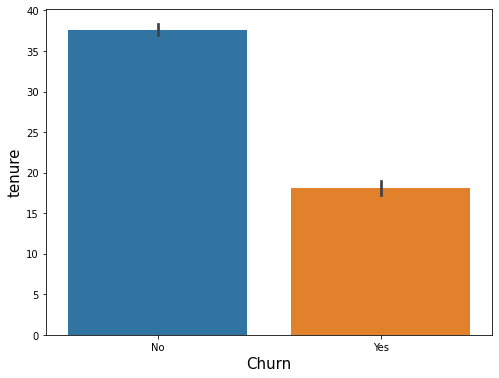

In [44]:
plt.figure(figsize=(8, 6))
sns.barplot(y='tenure', x='Churn', data= df)
plt.xlabel('Churn', fontsize=15)
plt.ylabel('tenure', fontsize=15)
plt.show()

Bar Plot indiactes Higher the tenure Chance of churn is less.

##### Multivariate Analysis

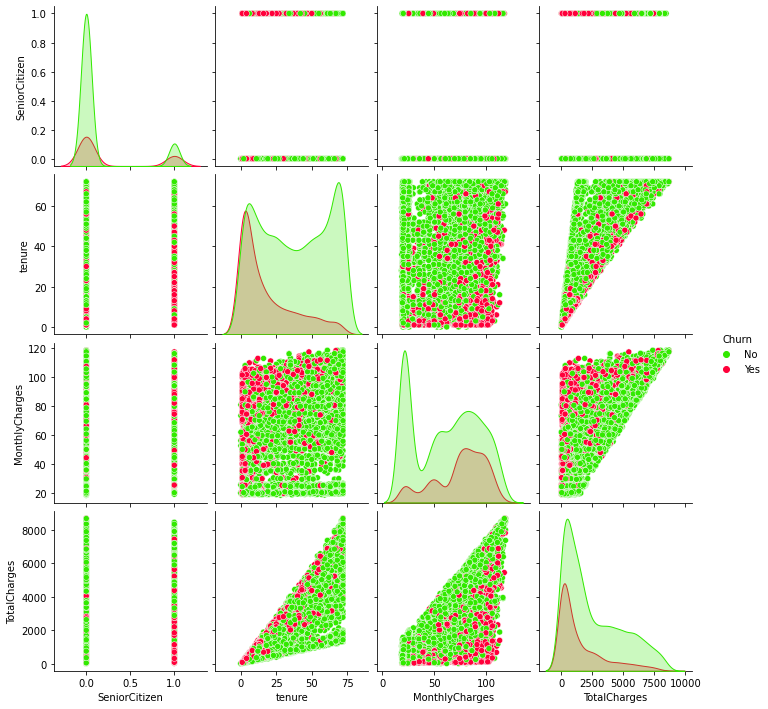

In [62]:
sns.pairplot(df,hue="Churn",palette="prism")
plt.show()

The pairplot gives the pairwise relation between the features on the basis of the target "Churn". On the diagonal we can notice the distribution plots. We can see linear relation with each other. There are no outliers in any of the columns but let's plot box plot to identify the outliers.

### Outliers

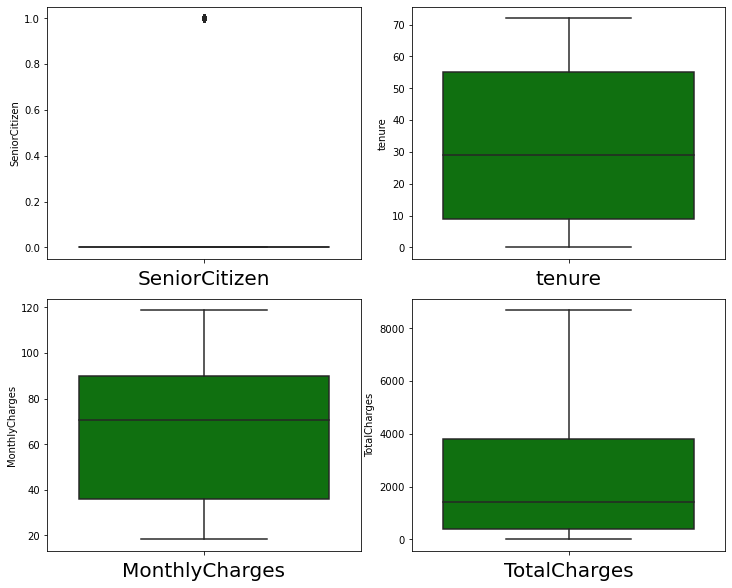

In [63]:
#Let's check the Outliers through Boxplot

plt.figure(figsize=(10,8), facecolor='white')
plotnumber = 1

for column in Num_data:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(y=column, data=df,color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

Except column SeniorCitizen, no other column has outliers. We can ignore SeniorCitizen column as it has catagorical data.

### Skewness

In [64]:
# Checking the skewness
df.skew()

SeniorCitizen     1.829987
tenure            0.235542
MonthlyCharges   -0.224097
TotalCharges      0.959910
dtype: float64

From above table, we can see some skewness on features TotalCharges. Let's visualise this through Dist plot

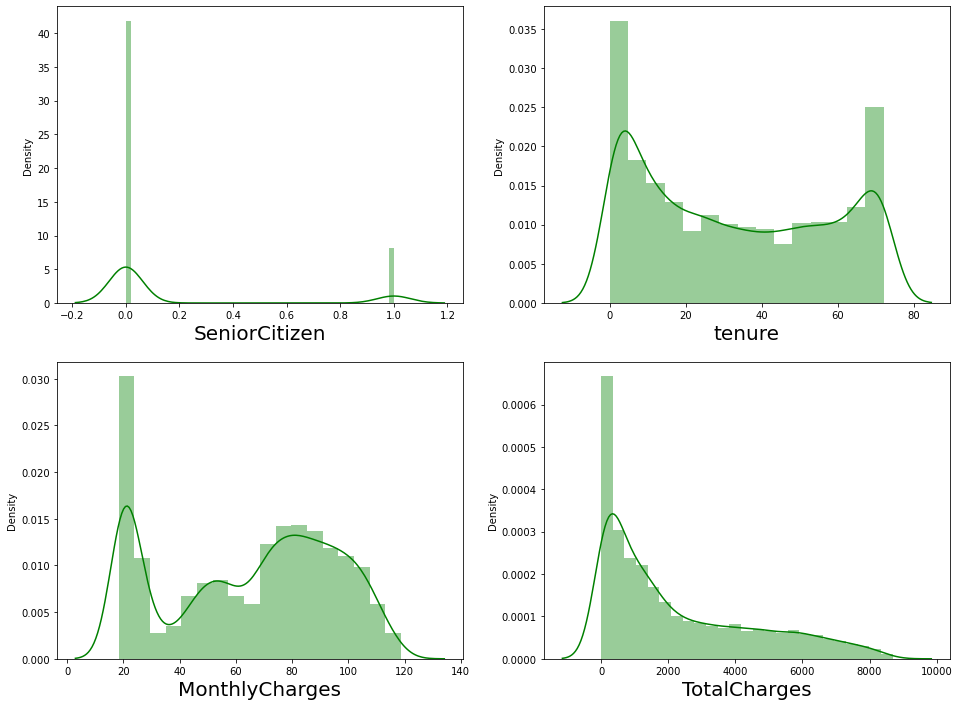

In [65]:
#Checking the skewness through Dist plot

plt.figure(figsize=(16,12), facecolor='white')
plotnumber = 1

for column in Num_data:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

#### Removing Skewness

In [66]:
# Removing skewness using square root method
df["TotalCharges"] = np.cbrt(df["TotalCharges"])

In [67]:
# Checking skewness again
df.skew()

SeniorCitizen     1.829987
tenure            0.235542
MonthlyCharges   -0.224097
TotalCharges      0.003337
dtype: float64

We can see the skewness has been reduced in TotalCharges column.

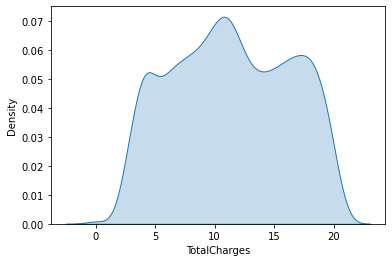

In [68]:
# Let's visualize how the data has been distributed in TotalCharges after removing skewness
sns.distplot(df["TotalCharges"],kde_kws={"shade": True},hist=False)
plt.show()

#### Encoding

##### Encoding the categorical columns using Ordinal Encoding

In [69]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


We have converted Catagorical data into Numeric format through Ordinal encoder

### Correlation

In [70]:
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001125,-0.001014,0.011081,0.006185,-0.006769,-0.005939,-0.001762,-0.015262,-0.012182,0.000449,-0.007045,-0.006461,-0.008781,0.000811,-0.011350,0.016304,-0.013158,-0.000834,-0.008763
SeniorCitizen,-0.001125,1.000000,0.015553,-0.212115,0.015349,0.008909,0.145521,-0.031221,-0.128267,-0.013675,-0.021448,-0.151349,0.030704,0.047209,-0.143624,0.156196,-0.037320,0.219434,0.106482,0.151619
Partner,-0.001014,0.015553,1.000000,0.451659,0.377346,0.018728,0.139827,0.003667,0.150589,0.152518,0.165752,0.126422,0.136443,0.128635,0.293042,-0.015776,-0.152069,0.094301,0.336650,-0.149135
Dependents,0.011081,-0.212115,0.451659,1.000000,0.157603,-0.001092,-0.027083,0.046608,0.151984,0.090502,0.080015,0.133303,0.046140,0.020525,0.241912,-0.112220,-0.038185,-0.116191,0.075289,-0.163459
tenure,0.006185,0.015349,0.377346,0.157603,1.000000,0.009786,0.340458,-0.026847,0.325762,0.370824,0.371062,0.323197,0.288737,0.296225,0.670728,0.005053,-0.367827,0.245251,0.869726,-0.351508
PhoneService,-0.006769,0.008909,0.018728,-0.001092,0.009786,1.000000,-0.019554,0.387549,-0.015026,0.024439,0.004043,-0.018980,0.055807,0.044322,0.003101,0.016824,-0.005304,0.248984,0.090903,0.011323
MultipleLines,-0.005939,0.145521,0.139827,-0.027083,0.340458,-0.019554,1.000000,-0.106819,0.006599,0.116625,0.121633,0.010909,0.174225,0.180113,0.108553,0.164814,-0.174073,0.432246,0.457794,0.040175
InternetService,-0.001762,-0.031221,0.003667,0.046608,-0.026847,0.387549,-0.106819,1.000000,-0.029421,0.035736,0.044563,-0.027019,0.107508,0.098435,0.102456,-0.137056,0.082669,-0.320525,-0.203743,-0.047366
OnlineSecurity,-0.015262,-0.128267,0.150589,0.151984,0.325762,-0.015026,0.006599,-0.029421,1.000000,0.184211,0.175061,0.284255,0.043553,0.054847,0.374556,-0.157024,-0.096968,-0.053347,0.243494,-0.288505
OnlineBackup,-0.012182,-0.013675,0.152518,0.090502,0.370824,0.024439,0.116625,0.035736,0.184211,1.000000,0.186760,0.194841,0.146071,0.135587,0.280658,-0.012565,-0.124724,0.120391,0.348664,-0.194214


Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

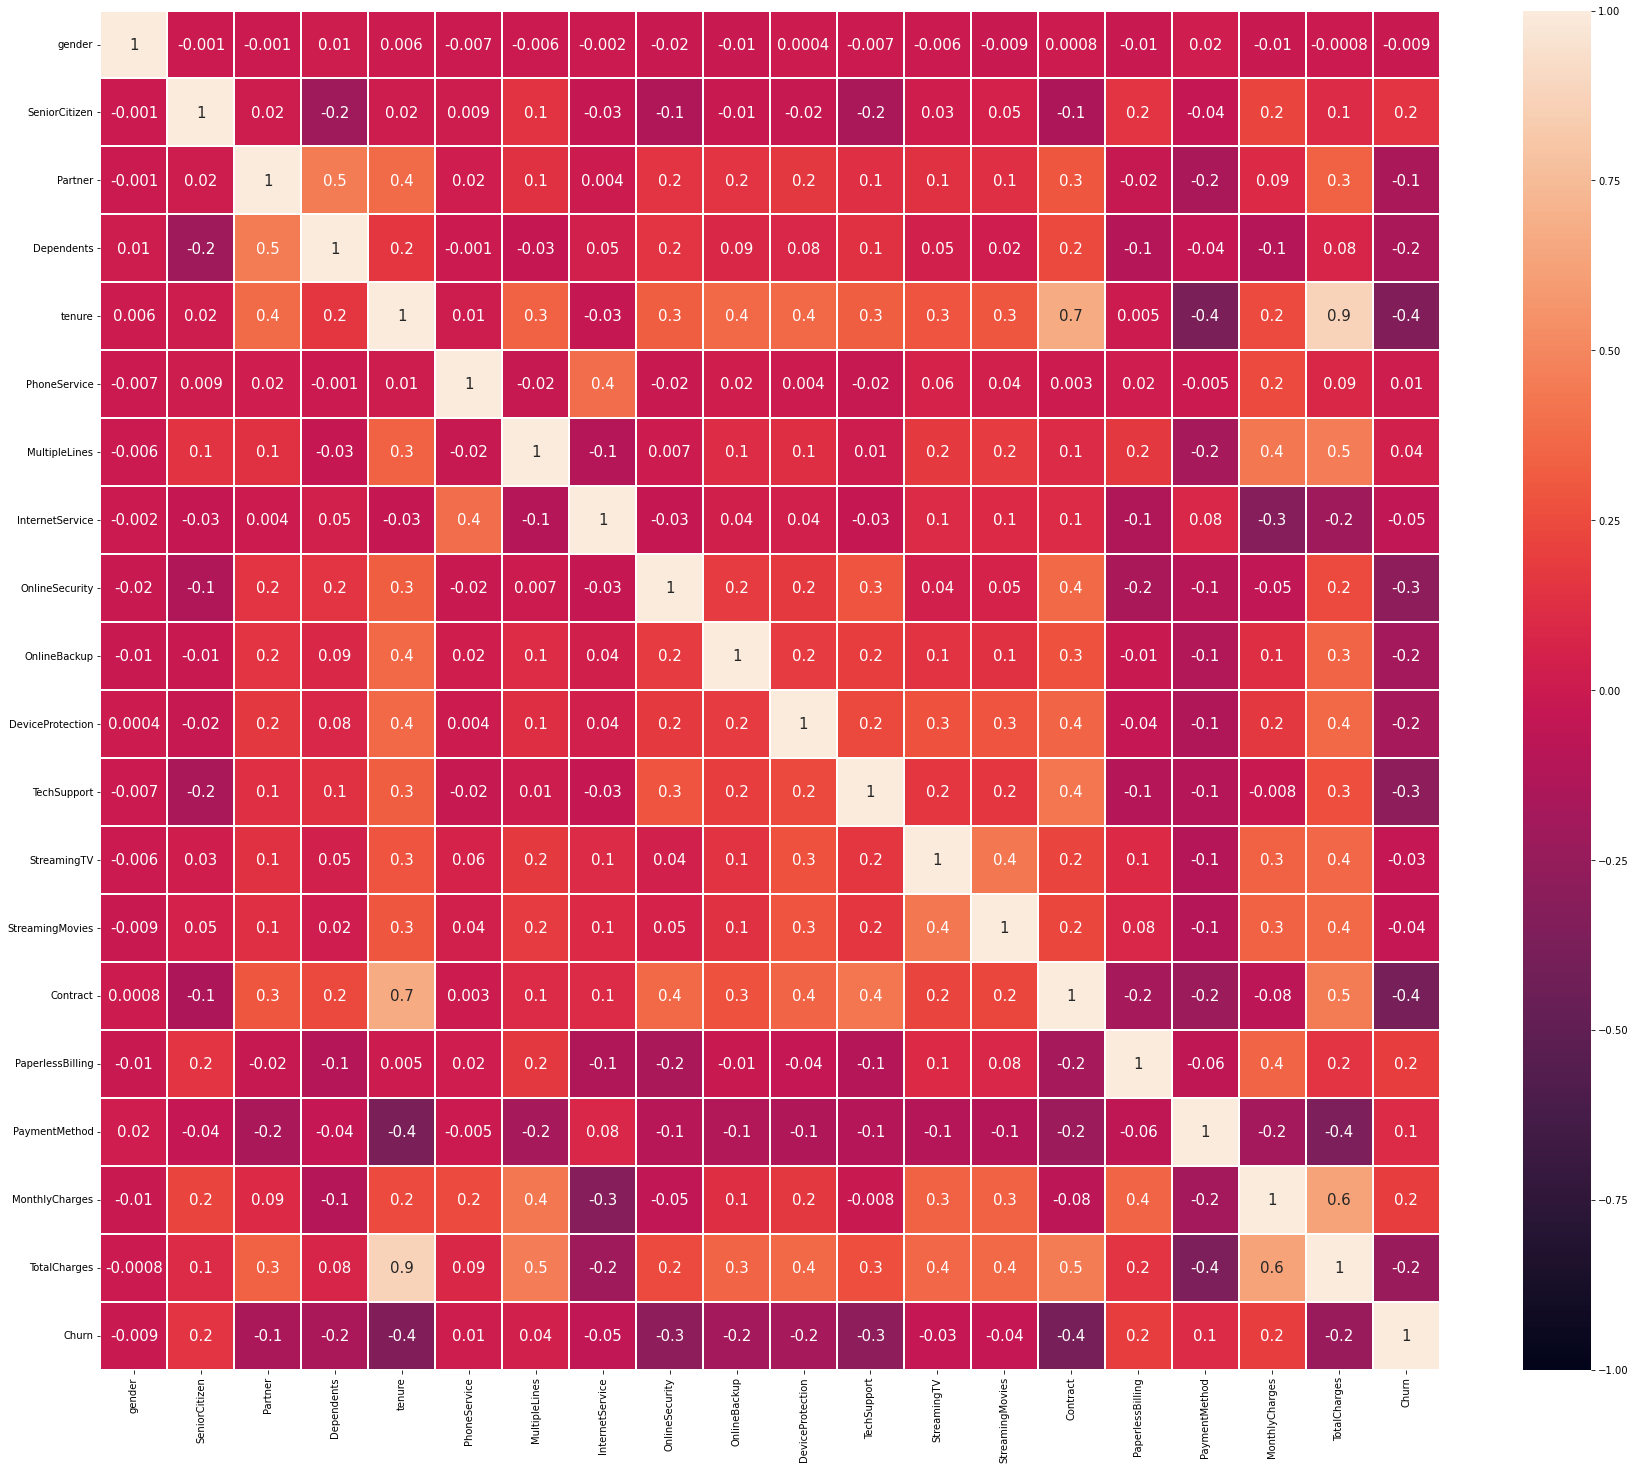

In [71]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, annot_kws={'size':15})
plt.yticks(rotation=0);

In the above heatmap we can see the correlation details plus we can determine that there is no multi colinearity issue between our columns.

In [72]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.194508
PaperlessBilling    0.190891
SeniorCitizen       0.151619
PaymentMethod       0.106238
MultipleLines       0.040175
PhoneService        0.011323
gender             -0.008763
StreamingTV        -0.034591
StreamingMovies    -0.036492
InternetService    -0.047366
Partner            -0.149135
Dependents         -0.163459
DeviceProtection   -0.176770
OnlineBackup       -0.194214
TotalCharges       -0.228912
TechSupport        -0.281654
OnlineSecurity     -0.288505
tenure             -0.351508
Contract           -0.396531
Name: Churn, dtype: float64

##### Visualizing the correlation between label and features using bar plot

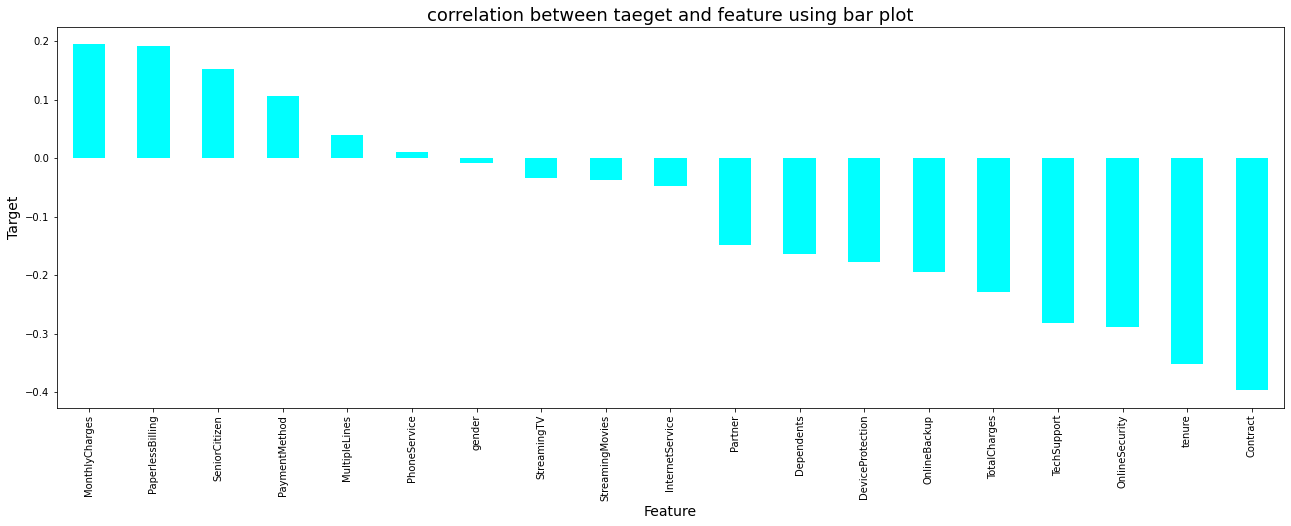

In [73]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='cyan')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between taeget and feature using bar plot',fontsize=18)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target. Here the features gender and PhoneService have very less correlation with the column.

### Separating the independent and target variables into x and y

In [74]:
x = df.drop('Churn', axis=1)
y = df['Churn']

In [75]:
y.value_counts()

0.0    5164
1.0    1857
Name: Churn, dtype: int64

### Oversampling

In [76]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [77]:
y.value_counts()

0.0    5164
1.0    5164
Name: Churn, dtype: int64

From above count, we can see our data is balanced now.

#### Scaling data with standard scaler

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.050859,-0.403811,1.177879,-0.601358,-1.112764,-3.158905,0.026912,-1.282531,-0.781741,1.366951,-0.930422,-0.788035,-1.081762,-1.082046,-0.668586,0.760065,0.371917,-1.333267,-1.553799
1,1.036610,-0.403811,-0.917891,-0.601358,0.259639,0.320199,-1.040510,-1.282531,1.647291,-0.925581,1.355787,-0.788035,-1.081762,-1.082046,0.635501,-1.400776,1.388364,-0.391263,0.322209
2,1.036610,-0.403811,-0.917891,-0.601358,-1.071176,0.320199,-1.040510,-1.282531,1.647291,1.366951,-0.930422,-0.788035,-1.081762,-1.082046,-0.668586,0.760065,1.388364,-0.499020,-1.217043
3,1.036610,-0.403811,-0.917891,-0.601358,0.717106,-3.158905,0.026912,-1.282531,1.647291,-0.925581,1.355787,1.631465,-1.081762,-1.082046,0.635501,-1.400776,-1.660976,-0.900502,0.300483
4,-1.050859,-0.403811,-0.917891,-0.601358,-1.071176,0.320199,-1.040510,0.210827,-0.781741,-0.925581,-0.930422,-0.788035,-1.081762,-1.082046,-0.668586,0.760065,0.371917,0.086691,-1.101919


This is our scaled data using standard scaler.

#### Variance Inflation Factor(VIF)

In [79]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.004217,gender
1,1.091044,SeniorCitizen
2,1.490251,Partner
3,1.380074,Dependents
4,14.073886,tenure
5,1.733496,PhoneService
6,1.430696,MultipleLines
7,1.744291,InternetService
8,1.322872,OnlineSecurity
9,1.230936,OnlineBackup


By checking VIF value we can find the features which causing multicollinearity problem. Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with the other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF(above 10).

In [80]:
# Dropping TotalCharges column
x.drop("TotalCharges",axis=1,inplace=True)

In [81]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.004216,gender
1,1.091014,SeniorCitizen
2,1.486326,Partner
3,1.379400,Dependents
4,2.897424,tenure
5,1.732565,PhoneService
6,1.422900,MultipleLines
7,1.712072,InternetService
8,1.313049,OnlineSecurity
9,1.228018,OnlineBackup


All the columns have VIF less than 10 which means the data is free from multicollinearity problem. So we can move further to build our machine learning models. 

## Modeling

### Finding best random state

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [85]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred = RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8712487899322362  on Random_state  162


Here we are getting accuracy score of 87.12% with Random state 162

Now splitting the data for Training and Testing purpose. 70% we are considering for Training and 30% for Testing purpose

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

### Random Forest Classifier

In [87]:
# Checking accuracy score for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8702807357212003
[[1377  172]
 [ 230 1320]]
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87      1549
         1.0       0.88      0.85      0.87      1550

    accuracy                           0.87      3099
   macro avg       0.87      0.87      0.87      3099
weighted avg       0.87      0.87      0.87      3099



### Gradient Boosting Classifier

In [90]:
# Checking accuracy score for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8635043562439496
[[1342  207]
 [ 216 1334]]
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      1549
         1.0       0.87      0.86      0.86      1550

    accuracy                           0.86      3099
   macro avg       0.86      0.86      0.86      3099
weighted avg       0.86      0.86      0.86      3099



### AdaBoost Classifier

In [91]:
# Checking accuracy score for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.856082607292675
[[1314  235]
 [ 211 1339]]
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85      1549
         1.0       0.85      0.86      0.86      1550

    accuracy                           0.86      3099
   macro avg       0.86      0.86      0.86      3099
weighted avg       0.86      0.86      0.86      3099



### Bagging Classifier

In [104]:
# Checking accuracy score for Bagging Classifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)

# Prediction
predBC = BC.predict(x_test)

print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test,predBC))

0.8583414004517587
[[1368  181]
 [ 258 1292]]
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1549
         1.0       0.88      0.83      0.85      1550

    accuracy                           0.86      3099
   macro avg       0.86      0.86      0.86      3099
weighted avg       0.86      0.86      0.86      3099



### Extra Trees Classifier

In [105]:
# Checking accuracy score for Extra Trees Classifier
XT = ExtraTreesClassifier()
XT.fit(x_train,y_train)

# Prediction
predXT = XT.predict(x_test)

print(accuracy_score(y_test, predXT))
print(confusion_matrix(y_test, predXT))
print(classification_report(y_test,predXT))

0.8686673120361407
[[1359  190]
 [ 217 1333]]
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1549
         1.0       0.88      0.86      0.87      1550

    accuracy                           0.87      3099
   macro avg       0.87      0.87      0.87      3099
weighted avg       0.87      0.87      0.87      3099



### XGB Classifier

In [94]:
# Checking accuracy for XGBClassifier
XGB = xgb(verbosity=0)
XGB.fit(x_train,y_train)

# Prediction
predXGB = XGB.predict(x_test)

print(accuracy_score(y_test, predXGB))
print(confusion_matrix(y_test, predXGB))
print(classification_report(y_test,predXGB))

0.8609228783478542
[[1357  192]
 [ 239 1311]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1549
         1.0       0.87      0.85      0.86      1550

    accuracy                           0.86      3099
   macro avg       0.86      0.86      0.86      3099
weighted avg       0.86      0.86      0.86      3099



### Checking the cross validation score

In [95]:
from sklearn.model_selection import cross_val_score

In [97]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8419983639180646


In [99]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.8421900995947299


In [100]:
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.828244727854881


In [101]:
# cv score for Bagging Classifier
print(cross_val_score(BC,x,y,cv=5).mean())

0.8349311931443948


In [102]:
# cv score for Extra Trees Classifier
print(cross_val_score(XT,x,y,cv=5).mean())

0.8487742277247914


In [103]:
# cv score for XGB Classifier
print(cross_val_score(XGB,x,y,cv=5).mean())

0.8381268033818611


From the above observation, looking at the accuracy score and the cross validation score we conclude that Extra Trees Classifier is our best fitting model

### Hyperparameter tuning

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [108]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [109]:
GCV.fit(x_train,y_train)

exception calling callback for <Future at 0x254c7e74310 state=finished raised ValueError>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))
  File "C:\

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [110]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 1000}

In [111]:
Final_Model = ExtraTreesClassifier(criterion='entropy', max_depth=20, n_estimators=300, n_jobs=-2, random_state=1000)
Final_Model.fit(x_train, y_train)
pred = Final_Model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

86.96353662471765


After tuning model accuracy is 86.96%

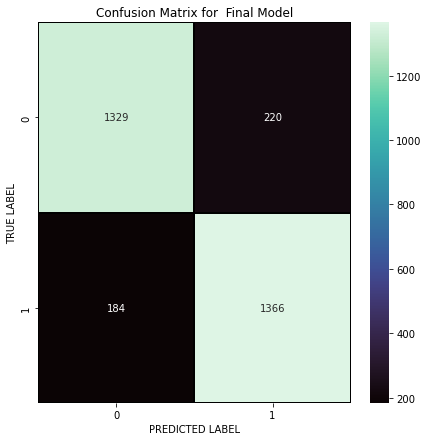

In [112]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap='mako', xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

#### Plotting ROC and Compare AUC for the best model

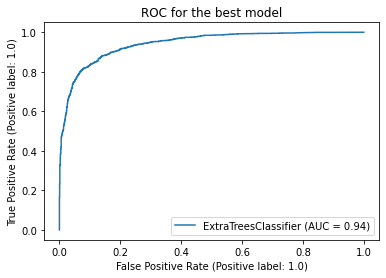

In [113]:
# Let's check the Auc for the best model after hyper parameter tuning
from sklearn.metrics import plot_roc_curve 

plot_roc_curve(Final_Model, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

Here I have generated the ROC Curve for final model and it shows the AUC score for my final model 94%

## Saving the model

In [114]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_Model,"Customer_Churn_Analysis.pkl")

['Customer_Churn_Analysis.pkl']

##### Predicting the saved model

In [115]:
# Loading the saved model
model=joblib.load("Customer_Churn_Analysis.pkl")

#Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,1.0,1.0
1,1.0,0.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
3094,0.0,0.0
3095,1.0,1.0
3096,1.0,0.0
3097,0.0,0.0


# Thank You !